In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import pandas as pd
import swifter
from information_bottleneck import IB

In [2]:
X_HAT_STR = "X\u0302"
BETA = "\u03B2"

### P(X=x, Y=y) in the Experiment Setup
Assume apriory unfirom distribution to the oddball chance, these are the probabilies for the joint distribution of X and Y:\
P(Yt+1 = 0, Xt = n) = (N-n+1) / ((N+2)(N+1))

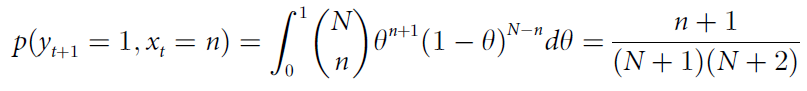

In [3]:
def calculate_pXY(N):
    pXY0 = [N-n+1 for n in range(N+1)]
    pXY1 = [n+1 for n in range(N+1)]
    denominator = (N+1)*(N+2)
    pXY = np.column_stack([pXY0,pXY1])/denominator
    return pXY

def init_pXhat_X(N):
    return np.eye(N+1)

def time_print(msg):
    print(pd.Timestamp.now().strftime('%Y-%m-%d %X'), msg)

Ns = np.arange(1,50+1)
betas = np.logspace(2,0, base=10, num=len(Ns))

out_vals = ["p(Xhat|X)","p(Y|Xhat)","I(Xhat;X)","I(Xhat;Y)"]
d_results = {N:dict(zip(betas, [None]*len(betas)))for N in Ns}

### Calculate Results of IB method and Model Surprise Predictor

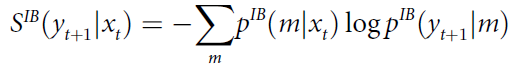

In [4]:
for N in d_results.keys():
    time_print("-"*10+f" N = {N} "+"-"*10)
    for beta in d_results[N].keys():
        d_results[N][beta] = IB(calculate_pXY(N),beta,init_pXhat_X(N))
        pXhat_X = d_results[N][beta]["p(Xhat|X)"]
        pY_Xhat = d_results[N][beta]["p(Y|Xhat)"]
        d_results[N][beta]["surprise"] = -np.log2(pY_Xhat) @ pXhat_X

2021-11-07 11:37:43 ---------- N = 1 ----------
2021-11-07 11:37:43 ---------- N = 2 ----------
2021-11-07 11:37:44 ---------- N = 3 ----------
2021-11-07 11:37:44 ---------- N = 4 ----------
2021-11-07 11:37:45 ---------- N = 5 ----------
2021-11-07 11:37:46 ---------- N = 6 ----------
2021-11-07 11:37:48 ---------- N = 7 ----------
2021-11-07 11:37:50 ---------- N = 8 ----------
2021-11-07 11:37:52 ---------- N = 9 ----------
2021-11-07 11:37:56 ---------- N = 10 ----------
2021-11-07 11:37:59 ---------- N = 11 ----------
2021-11-07 11:38:03 ---------- N = 12 ----------
2021-11-07 11:38:08 ---------- N = 13 ----------
2021-11-07 11:38:13 ---------- N = 14 ----------
2021-11-07 11:38:20 ---------- N = 15 ----------
2021-11-07 11:38:28 ---------- N = 16 ----------
2021-11-07 11:38:39 ---------- N = 17 ----------
2021-11-07 11:38:51 ---------- N = 18 ----------
2021-11-07 11:39:06 ---------- N = 19 ----------
2021-11-07 11:39:19 ---------- N = 20 ----------
2021-11-07 11:39:33 ---------

In [5]:
# unpacking
df_results = pd.DataFrame.from_dict(d_results, orient='index')
df_mi_compression = df_results.applymap(lambda d: d["I(Xhat;X)"])
df_mi_accuracy = df_results.applymap(lambda d: d["I(Xhat;Y)"])
df_pXhat_X = df_results.applymap(lambda d: d["p(Xhat|X)"])
df_pY_Xhat = df_results.applymap(lambda d: d["p(Y|Xhat)"])
df_surprise = df_results.applymap(lambda d: d["surprise"])

# saving
df_mi_compression.to_pickle("df_mi_compression.pkl")
df_mi_accuracy.to_pickle("df_mi_accuracy.pkl")
df_pXhat_X.to_pickle("df_pXhat_X.pkl")
df_pY_Xhat.to_pickle("df_pY_Xhat.pkl")
df_surprise.to_pickle("df_surprise.pkl